In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
#Load the dependancies
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import show,pixels
import pydicom
import seaborn as sns
matplotlib.rcParams['image.cmap'] = 'bone'
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
import os 
folder_path = "dicom_dir"
images_path = os.listdir(folder_path)

In [4]:
dimg  = pydicom.dcmread(os.path.join(folder_path, images_path[0]))
dimg

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [5]:
dimg.PixelData[:200]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

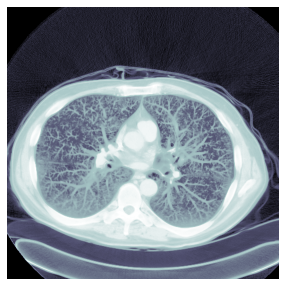

In [6]:
dimg.show(1)


In [7]:
dimg.pixel_array, dimg.pixel_array.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 (512, 512))

In [8]:
#lets convert the pixel_array into a tensor.  Fastai can #conveniently do this for us
tensor_dicom = dimg.pixels #convert into tensor
print(tensor_dicom )
print(f'RescaleIntercept: {dimg.RescaleIntercept:1f}\nRescaleSlope: {dimg.RescaleSlope:1f}\nMax pixel: '
      f'{tensor_dicom.max()}\nMin pixel: {tensor_dicom.min()}\nShape: {tensor_dicom.shape}')

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
RescaleIntercept: -1024.000000
RescaleSlope: 1.000000
Max pixel: 1918.0
Min pixel: 0.0
Shape: torch.Size([512, 512])


(array([1.73881e+05, 1.82440e+04, 4.70700e+03, 3.24000e+03, 1.53940e+04,
        3.50250e+04, 7.98600e+03, 2.62500e+03, 8.99000e+02, 1.43000e+02]),
 array([   0. ,  191.8,  383.6,  575.4,  767.2,  959. , 1150.8, 1342.6,
        1534.4, 1726.2, 1918. ], dtype=float32),
 <BarContainer object of 10 artists>)

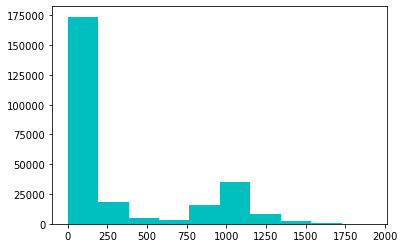

In [9]:
plt.hist(tensor_dicom.flatten().numpy(), color='c')

(array([1.73881e+05, 1.82440e+04, 4.70700e+03, 3.24000e+03, 1.53940e+04,
        3.50250e+04, 7.98600e+03, 2.62500e+03, 8.99000e+02, 1.43000e+02]),
 array([-1024. ,  -832.2,  -640.4,  -448.6,  -256.8,   -65. ,   126.8,
          318.6,   510.4,   702.2,   894. ], dtype=float32),
 <BarContainer object of 10 artists>)

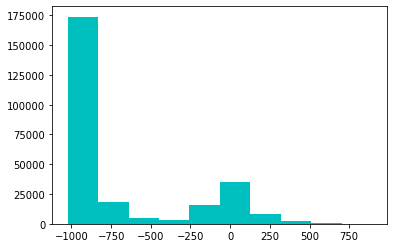

In [10]:
tensor_dicom_scaled = dimg.scaled_px
plt.hist(tensor_dicom_scaled.flatten().numpy(), color='c')

In [11]:
print(f'Max pixel: {tensor_dicom_scaled.max()}\nMin pixel: {tensor_dicom_scaled.min()}')

Max pixel: 894.0
Min pixel: -1024.0


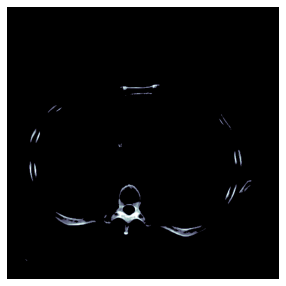

In [12]:
#bone - air is black
dimg.show(min_px=300,max_px=1500, figsize=(5,5))

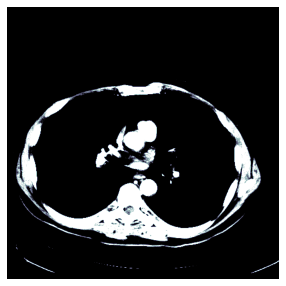

In [13]:
#blood 13-50
dimg.show(min_px=13,max_px=50, figsize=(5,5))

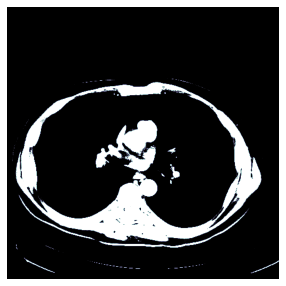

In [14]:
#water 0 
dimg.show(min_px=-10,max_px=10, figsize=(5,5))

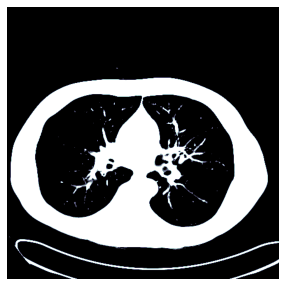

In [15]:
#lung Parenchima −700 to −600
dimg.show(min_px=-700,max_px=-600, figsize=(5,5))

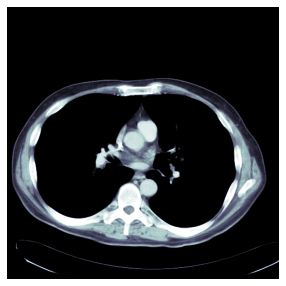

In [16]:
#heart−700 to −600
dimg.show(min_px=-250,max_px=250, figsize=(5,5))

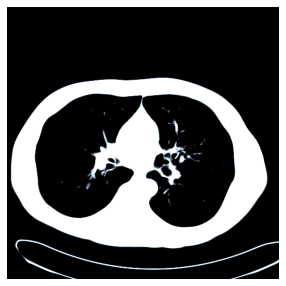

In [17]:
#-600 -250 non ci sono molti pixel in questo range
dimg.show(min_px=-600,max_px=-250, figsize=(5,5))

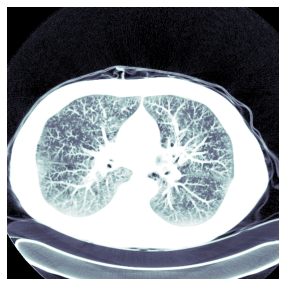

In [18]:
#-600 -250 bronchi
dimg.show(min_px=-1000,max_px=-600, figsize=(5,5))

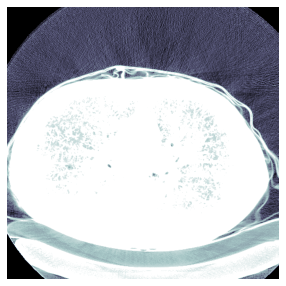

In [19]:
#-1100 - 600 bronchi
dimg.show(min_px=-1100,max_px=-900, figsize=(5,5))

(array([1.73881e+05, 1.82440e+04, 4.70700e+03, 3.24000e+03, 1.53940e+04,
        3.50250e+04, 7.98600e+03, 2.62500e+03, 8.99000e+02, 1.43000e+02]),
 array([-1024. ,  -832.2,  -640.4,  -448.6,  -256.8,   -65. ,   126.8,
          318.6,   510.4,   702.2,   894. ], dtype=float32),
 <BarContainer object of 10 artists>)

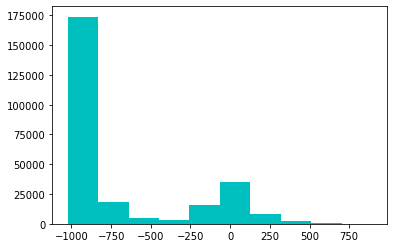

In [20]:
plt.hist(tensor_dicom_scaled.flatten().numpy(), color='c')

<AxesSubplot:>

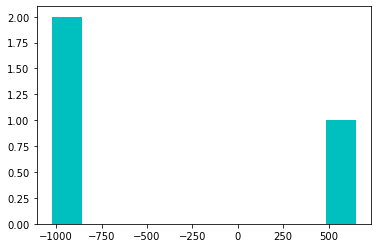

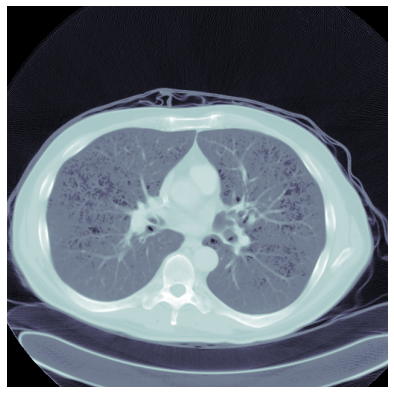

In [21]:
ten_freq = tensor_dicom_scaled.freqhist_bins(n_bins=1)
fh = dimg.hist_scaled(ten_freq)
plt.hist(ten_freq.flatten().numpy(), color='c'); show_image(fh, figsize=(7,7))

<AxesSubplot:>

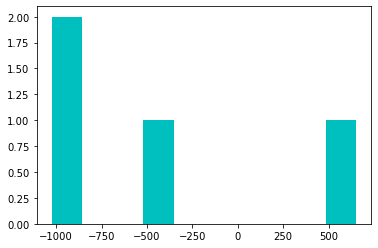

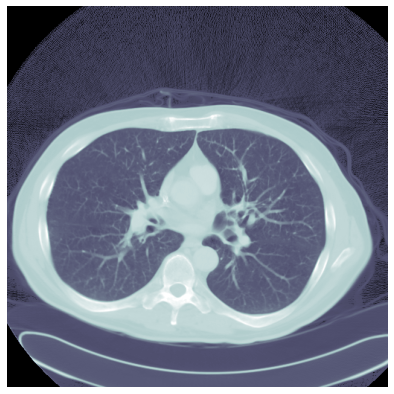

In [22]:
ten_freq = tensor_dicom_scaled.freqhist_bins(n_bins=2)
fh = dimg.hist_scaled(ten_freq)
plt.hist(ten_freq.flatten().numpy(), color='c'); show_image(fh, figsize=(7,7))

<AxesSubplot:>

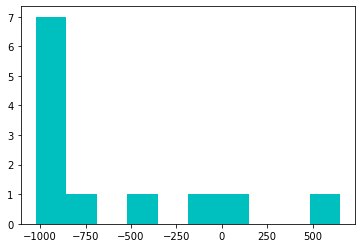

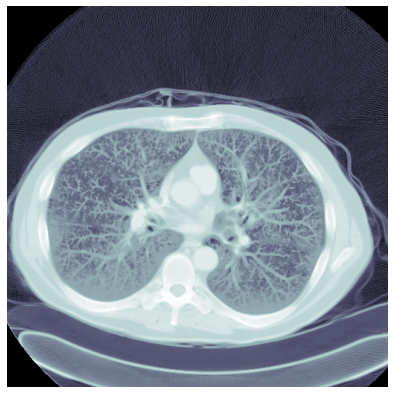

In [23]:
ten_freq = tensor_dicom_scaled.freqhist_bins(n_bins=10)
fh = dimg.hist_scaled(ten_freq)
plt.hist(ten_freq.flatten().numpy(), color='c'); show_image(fh, figsize=(7,7))

<AxesSubplot:>

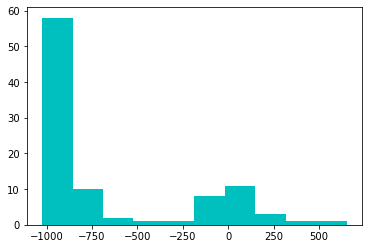

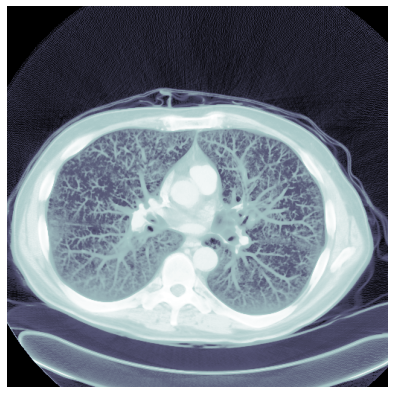

In [24]:
ten_freq = tensor_dicom_scaled.freqhist_bins(n_bins=100)
fh = dimg.hist_scaled(ten_freq)
plt.hist(ten_freq.flatten().numpy(), color='c'); show_image(fh, figsize=(7,7))

<AxesSubplot:>

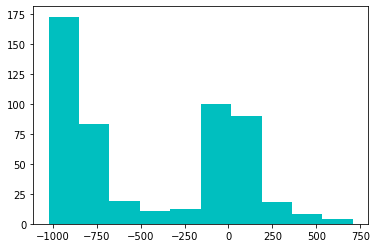

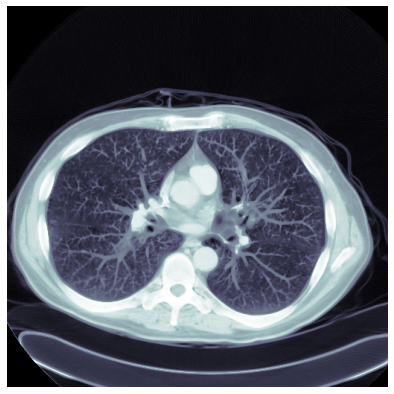

In [25]:
ten_freq = tensor_dicom_scaled.freqhist_bins(n_bins=1000)
fh = dimg.hist_scaled(ten_freq)
plt.hist(ten_freq.flatten().numpy(), color='c'); show_image(fh, figsize=(7,7))

<AxesSubplot:>

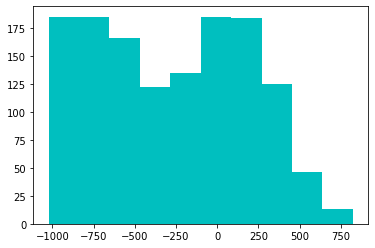

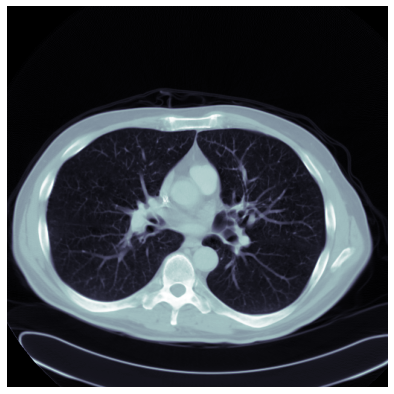

In [26]:
ten_freq = tensor_dicom_scaled.freqhist_bins(n_bins=10000)
fh = dimg.hist_scaled(ten_freq)
plt.hist(ten_freq.flatten().numpy(), color='c'); show_image(fh, figsize=(7,7))